In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 [==============================] - 4s 4ms/step - loss: 0.2972 - accuracy: 0.9141 - val_loss: 0.1174 - val_accuracy: 0.9660
Epoch 2/5
844/844 [==============================] - 2s 3ms/step - loss: 0.1212 - accuracy: 0.9637 - val_loss: 0.0951 - val_accuracy: 0.9728
Epoch 3/5
844/844 [==============================] - 2s 3ms/step - loss: 0.0831 - accuracy: 0.9745 - val_loss: 0.0968 - val_accuracy: 0.9712
Epoch 4/5
844/844 [==============================] - 2s 2ms/step - loss: 0.0610 - accuracy: 0.9816 - val_loss: 0.0887 - val_accuracy: 0.9727
Epoch 5/5
844/844 [==============================] - 2s 3ms/step - loss: 0.0492 - accuracy: 0.9846 - val_loss: 0.0842 - val_accuracy: 0.9770


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 0s 1ms/step - loss: 0.0837 - accuracy: 0.9736
Test accuracy: 0.9735999703407288


In [6]:
predictions = model.predict(test_images[:10])
predicted_labels = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 80ms/step


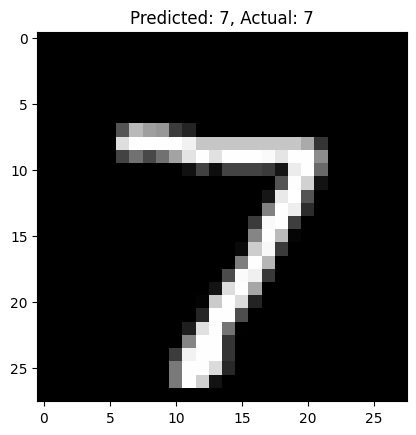

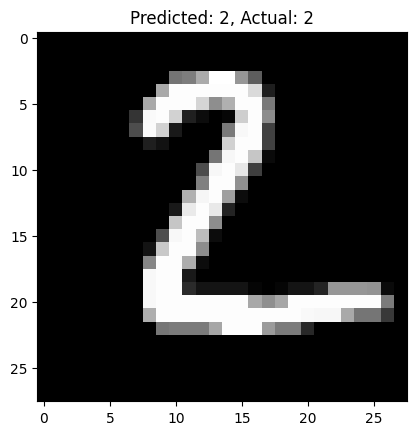

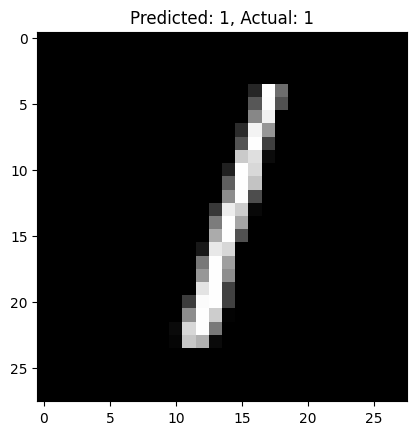

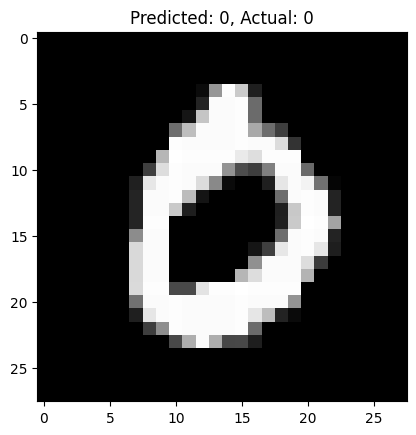

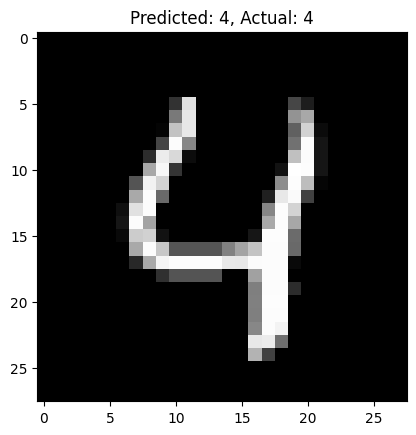

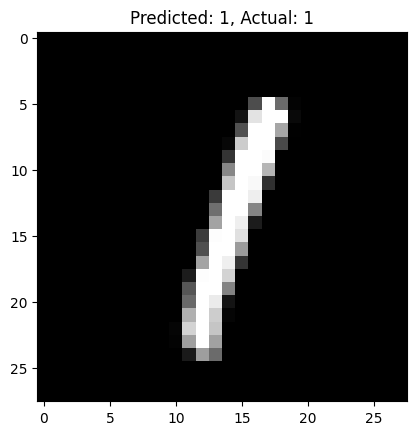

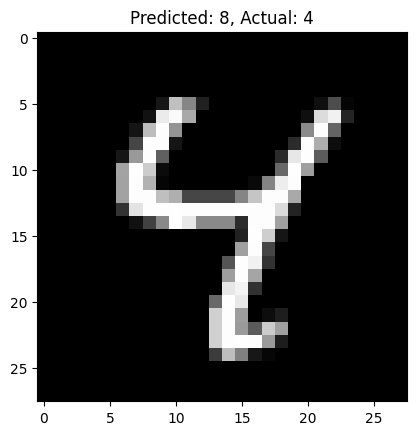

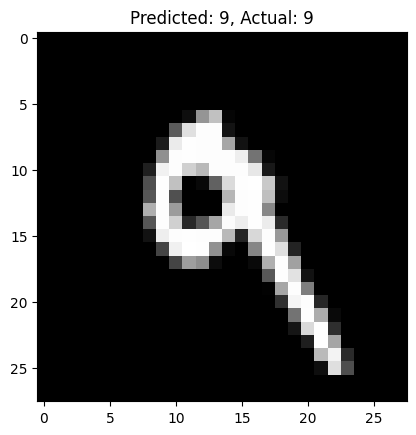

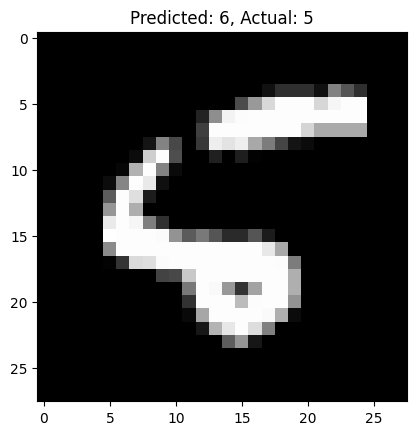

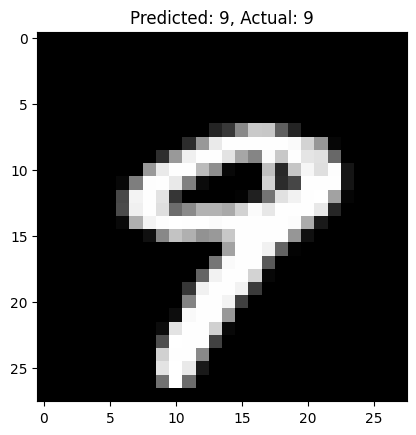

In [7]:
for i in range(10):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {np.argmax(test_labels[i])}")
    plt.show()